<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_assumptions_of_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)
engine.dispose()

Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [ ]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


All the required variables are numeric, so we don't need to worry about one-hot encoding to create dummy variables. Check for missing values.

In [ ]:
weather_df.isnull().any()

date                   False
summary                False
preciptype             False
temperature            False
apparenttemperature    False
humidity               False
windspeed              False
windbearing            False
visibility             False
loudcover              False
pressure               False
dailysummary           False
dtype: bool

There are no missing values. Build the model.

In [ ]:
Y = weather_df.temperature
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']] 

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

print(lrm.coef_)
print(lrm.intercept_)

[-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
37.92643818528538


Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Assumption: The error term should be zero on average.

In [ ]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors is: {}".format(np.mean(errors)))

Mean of the errors is: -3.732130268532674e-15


While not quite zero, the mean of the errors is close to 0 at -3.

Assumption: Homoscedasticity

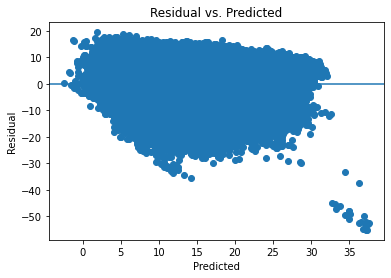

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
print(bartlett(predictions, errors))
print(levene(predictions, errors))

BartlettResult(statistic=2464.844656867369, pvalue=0.0)
LeveneResult(statistic=2321.2401008574006, pvalue=0.0)


There is heteroscedasticity in the model. The plot shows that there might be some sort of pattern or clustering, and the Bartlett and Levene tests indicate that we cannot reject the null (of homoscedasticity).

Assumption: Low (or no) multicollinearity

In [ ]:
X.corr()

,humidity,windspeed,windbearing,pressure
humidity,1.000000,-0.224951,0.000735,0.005454
windspeed,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.000735,0.103822,1.000000,-0.011651
pressure,0.005454,-0.049263,-0.011651,1.000000


This assumption seems to be met, as most variables have minimal correlation. Windspeed and humidity are the most correlated at -.22. This does not seem like a strong enough correlation to address it.

Assumption: Error terms should be uncorrelated with one another

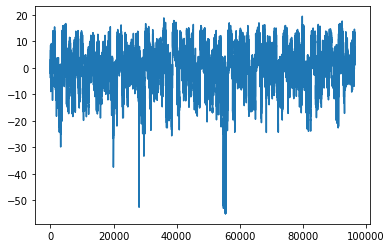

In [ ]:
plt.plot(errors)
plt.show()

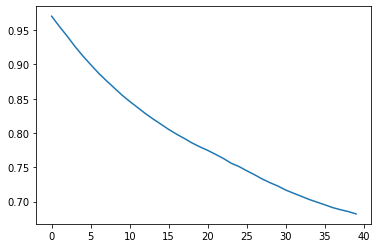

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

The autocorrelation function indicates that the error terms are correlated with each other, and sometimes very strongly so.

Assumption: Explanatory variables and error terms should be independent

In [ ]:
print(weather_df['humidity'].corr(errors))
print(weather_df['windspeed'].corr(errors))
print(weather_df['windbearing'].corr(errors))
print(weather_df['pressure'].corr(errors))

-3.7836822074319153e-16
-1.3497274433668816e-16
-1.703423922085657e-16
8.559745821849717e-18


It looks like the error terms are not correlated with one another.

This model has violated a few assumptions. These issues will need to be addressed (e.g., adding omitted variables, removing correlated explanatory variables, etc.).